In [2]:
import matplotlib.pyplot as plt
# !pip install mpl_finance
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates


In [3]:
df = pd.read_csv("ce_setout_final_pruned_R.csv")

In [41]:
df["Perc"] = df["DefectCountSum"]*100/df["SampleSizeSum"]

In [5]:
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"])

In [6]:
df1 = df.groupby("LineName")["TimeStamp"].idxmin()


In [13]:
d = dict(df1)
d

{'J13': 28,
 'J14': 8,
 'J15': 7,
 'J16': 0,
 'J17': 2,
 'J18': 3,
 'J19': 1,
 'J20': 4}

In [47]:
open_ = []
close = []
max_ = []
min_ = []

for k, v in d.items():
    open_.append(df["Perc"][v])

In [48]:
open_ = [round(elem, 3) for elem in open_]
open_

[5.0, 1.167, 1.538, 1.231, 1.333, 1.278, 1.333, 4.889]

In [49]:
df1 = df.groupby("LineName")["TimeStamp"].idxmax()


In [50]:
for k, v in df1.items():
    close.append(df["Perc"][v])


In [51]:
close = [round(elem,3) for elem in close]
close

[3.5, 1.059, 1.455, 1.2, 1.267, 1.1, 1.125, 3.714]

[26.667, 2.818, 2.8, 2.8, 2.545, 3.429, 2.667, 13.0]

In [52]:
df1 = df.groupby("LineName")["Perc"].max()
for k, v in df1.items():
    max_.append(round(v,3))
max_

[26.667, 2.818, 2.8, 2.8, 2.545, 3.429, 2.667, 13.0]

In [54]:
df1 = df.groupby("LineName")["Perc"].min()
for k, v in df1.items():
    min_.append(round(v,3))
min_


[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2]

In [55]:
open_, close, max_, min_

([5.0, 1.167, 1.538, 1.231, 1.333, 1.278, 1.333, 4.889],
 [3.5, 1.059, 1.455, 1.2, 1.267, 1.1, 1.125, 3.714],
 [26.667, 2.818, 2.8, 2.8, 2.545, 3.429, 2.667, 13.0],
 [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2])

In [56]:
lines = list(df["LineName"].unique())
# lines = lines.sort()
lines.sort()

In [57]:
lines

['J13', 'J14', 'J15', 'J16', 'J17', 'J18', 'J19', 'J20']

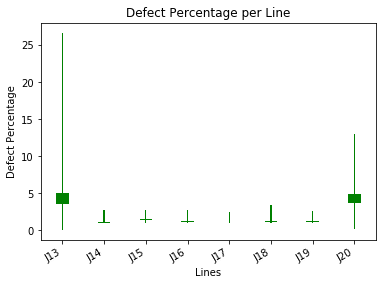

In [59]:
stock_prices = pd.DataFrame({'open': open_,
                             'close': close,
                             'high': max_,
                             'low': min_},
                            index= lines)


plt.figure()

# "up" dataframe will store the stock_prices
# when the closing stock price is greater
# than or equal to the opening stock prices
up = stock_prices[stock_prices.close >= stock_prices.open]

# "down" dataframe will store the stock_prices
# when the closing stock price is
# lesser than the opening stock prices
down = stock_prices[stock_prices.close < stock_prices.open]

# When the stock prices have decreased, then it
# will be represented by blue color candlestick
col1 = 'blue'

# When the stock prices have increased, then it
# will be represented by green color candlestick
col2 = 'green'

# Setting width of candlestick elements
width = .3
width2 = .03

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')

plt.title("Defect Percentage per Line")

plt.xlabel("Lines")
plt.ylabel("Defect Percentage")
# displaying candlestick chart of stock data
# of a week
plt.show()
